In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load dataset
data = pd.read_csv("/content/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Data Frame
df = pd.DataFrame(data)

In [ ]:
df.describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# check any null
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# tha last columnt is empty , i will drop it

In [ ]:
# check for any duplicated rows
df.duplicated().sum()

0

In [ ]:
# drop id , Unnamed: 32 columns
columns_to_drop = ["id", 'Unnamed: 32']

for column in columns_to_drop:
    df.drop(column, axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


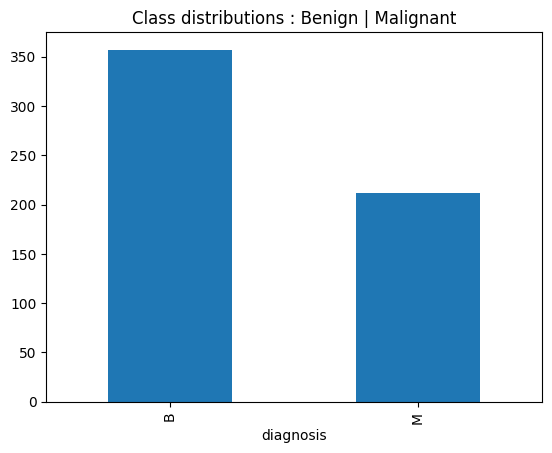

In [ ]:
plot = data['diagnosis'].value_counts().plot(kind='bar', title="Class distributions : Benign | Malignant")
fig = plot.get_figure()

# convert categorical data into numeric

In [ ]:
# Benign : 0 , Maligant : 1

# Set the option to not allow silent downcasting
pd.set_option("mode.use_inf_as_na", True)

df["diagnosis"] = df["diagnosis"].replace(["B" , "M"] , [0,1]).infer_objects()
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Cancerous gland vs diagnosis

feature_list = list(df.columns[1:11])

df_M=df[df['diagnosis'] ==1]
df_B=df[df['diagnosis'] ==0]

In [ ]:
feature_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

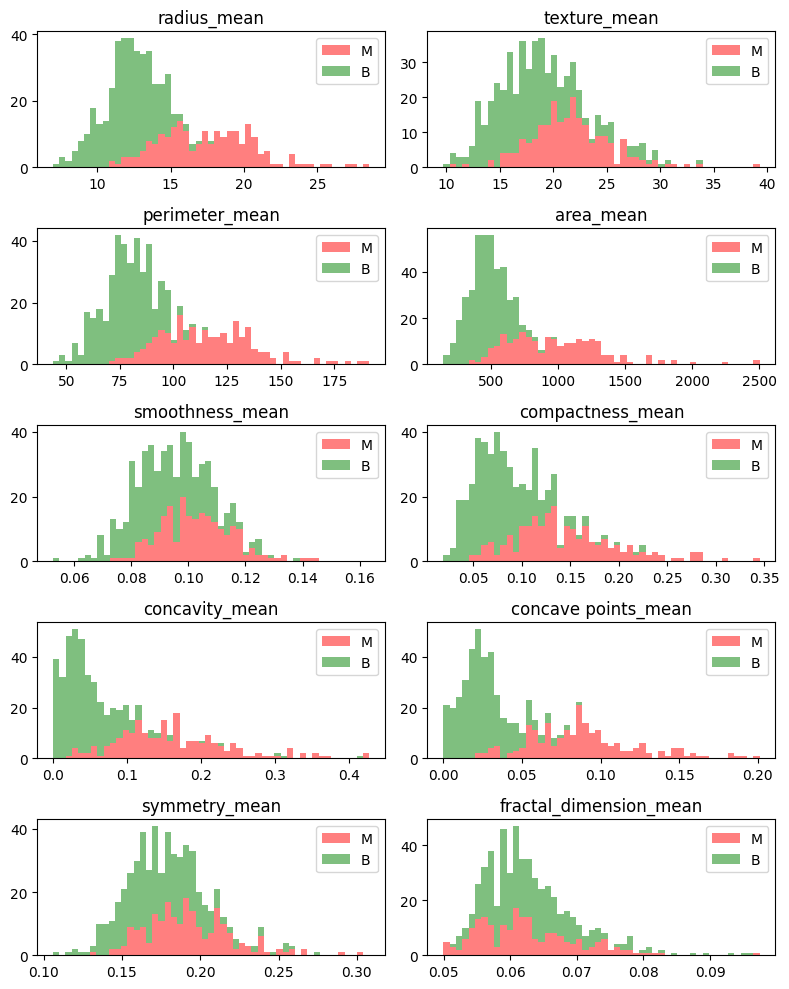

In [ ]:
# change the font size for all text in figure
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
#converts the 2D array of axes to a 1D array so that they can be easily traversed in a loop.
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[feature_list[idx]]) - min(df[feature_list[idx]]))/50
    ax.hist([df_M[feature_list[idx]],df_B[feature_list[idx]]],
            bins=np.arange(min(df[feature_list[idx]]),
                           max(df[feature_list[idx]]) + binwidth, binwidth) ,
            alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(feature_list[idx])
plt.tight_layout()
plt.show()

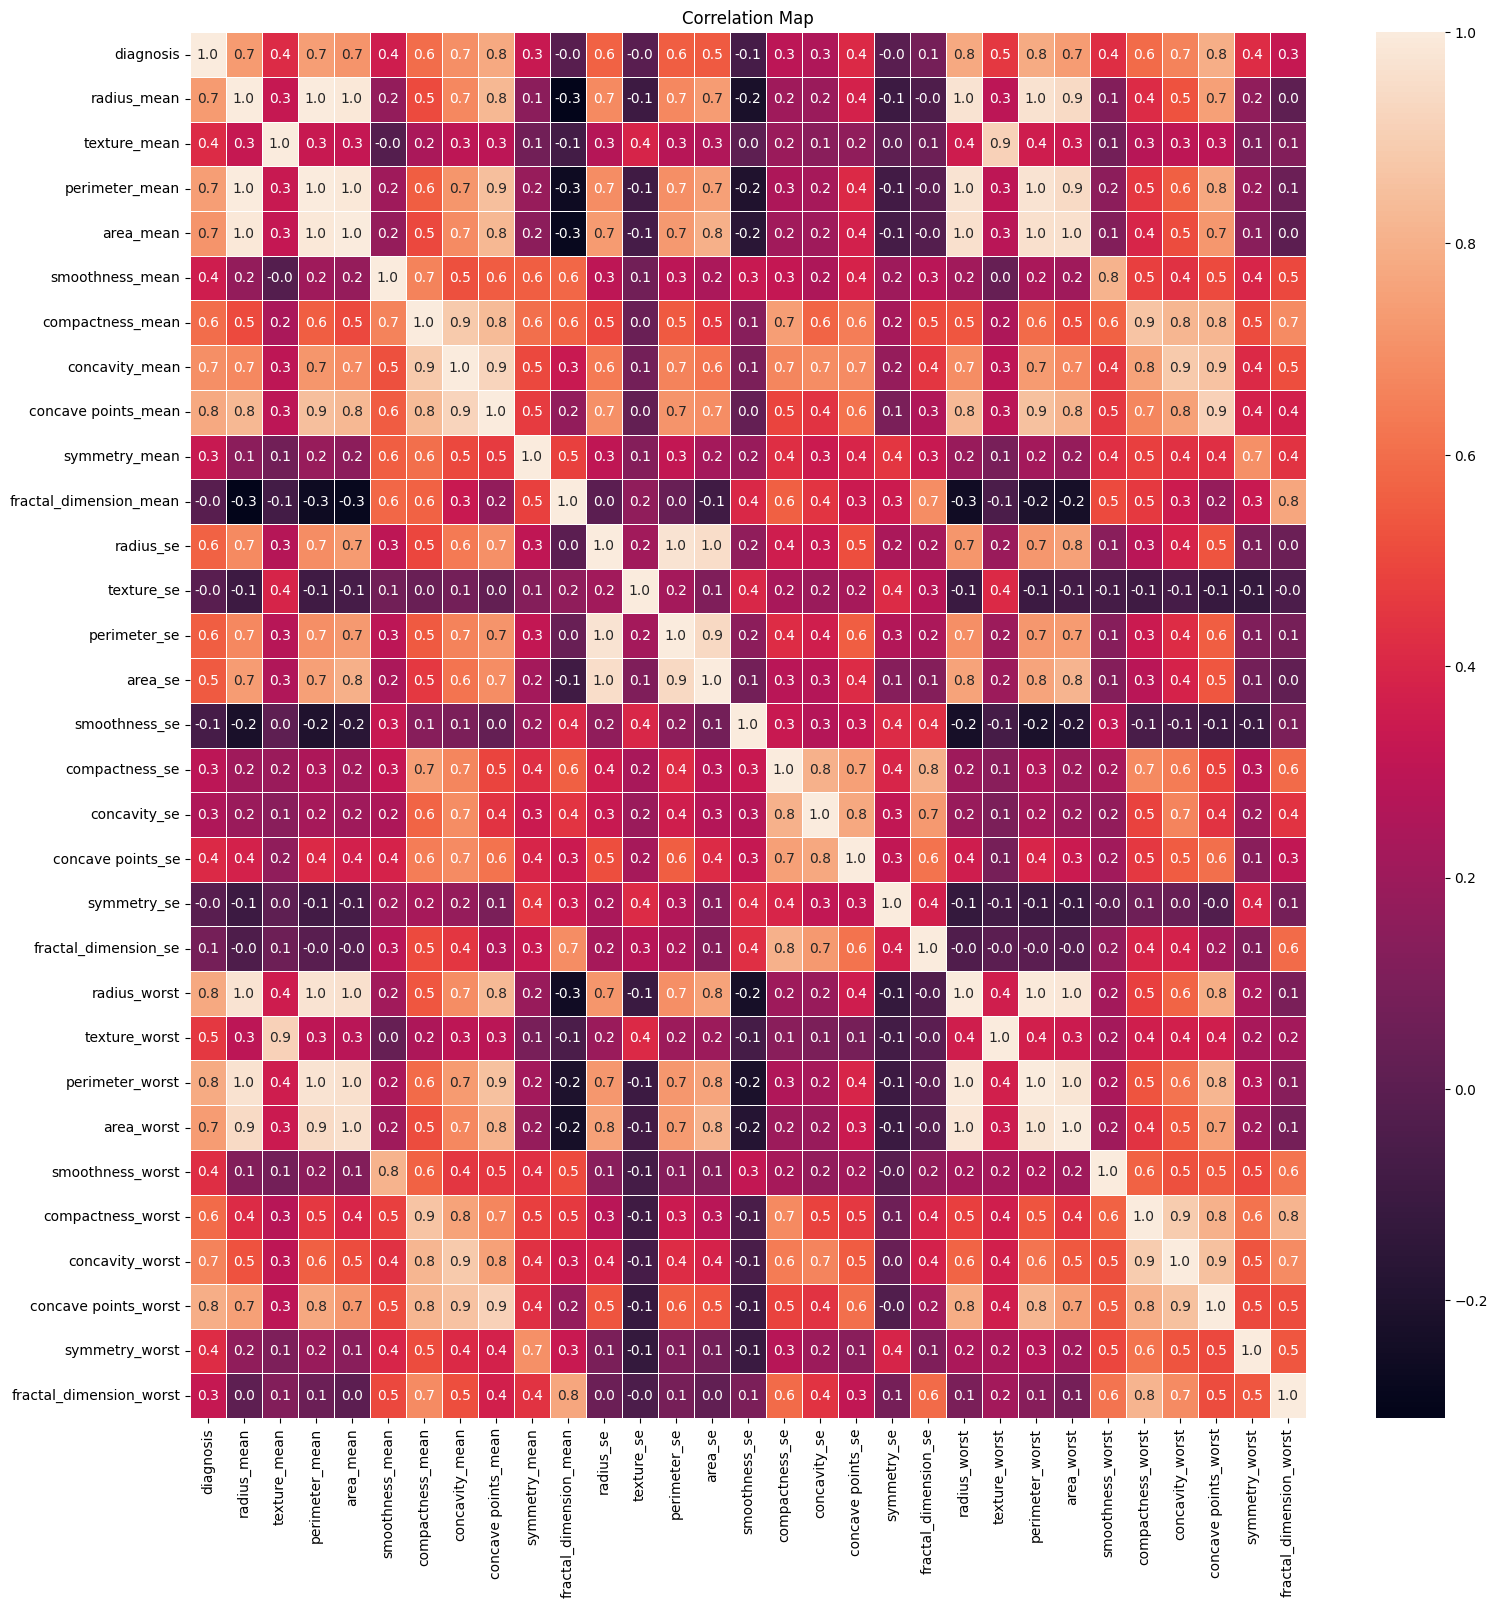

In [ ]:
#correlation map
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [ ]:
#Model :
#Logistic_Regression

# split data
x = df.drop(["diagnosis"] , axis = 1)
y = df["diagnosis"]

# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
# Logistic Regression model
model_lr = LogisticRegression(max_iter = 10000)

# fit data
model_lr.fit(x_train, y_train)

# Predict the target variable
y_pred = model_lr.predict(x_test)

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9766


In [ ]:
# calssification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
confusion_matrix(y,model_lr.predict(x))

array([[349,   8],
       [ 12, 200]])

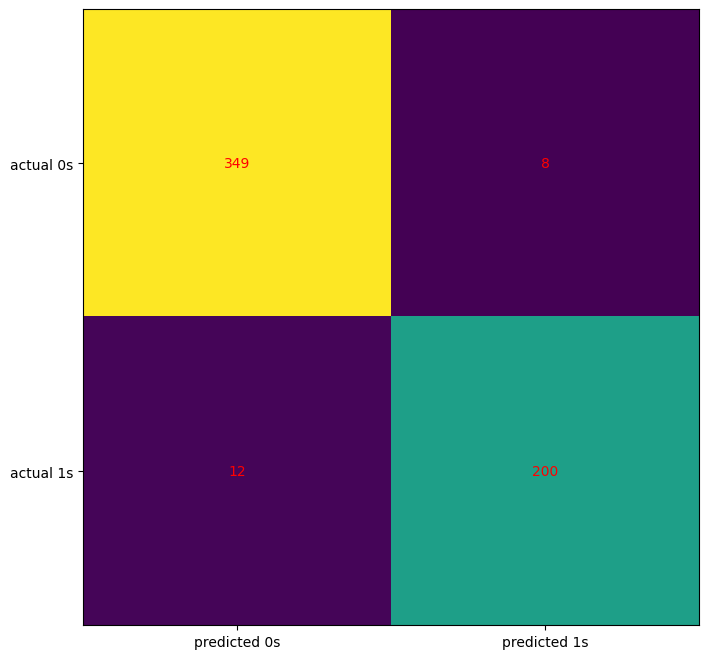

In [ ]:
cm = confusion_matrix(y,model_lr.predict(x))

fig ,ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s" , "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("actual 0s" , "actual 1s"))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i , cm[i,j] , ha = "center" , va = "center" , color = "red")
plt.show()

In [ ]:
# Normalizing data

scaler = StandardScaler()
df_xscaled = scaler.fit_transform(x)

# split train and test
x_train, x_test, y_train, y_test = train_test_split(df_xscaled, y, test_size=0.30, random_state=42)

# Logistic Regression model
model_lr = LogisticRegression()

# fit data
model_lr.fit(x_train, y_train)

# Predict the target variable
y_pred = model_lr.predict(x_test)

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9825


In [ ]:
# calssification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



KNN

In [ ]:
X =  df.select_dtypes(include=['float64'])
y =df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [ ]:
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



<Axes: >

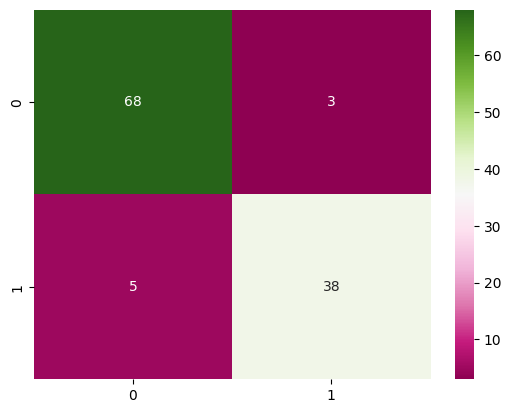

In [ ]:
sns.heatmap(conf_matrix,annot=True,cmap='PiYG')

ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
for column in df.columns:
    print(f'Max and min values of {column} are:')
    print(f'Max value is {df[column].max()}')
    print(f'Min value is {df[column].min()}')
    print('\n')

Max and min values of diagnosis are:
Max value is 1
Min value is 0


Max and min values of radius_mean are:
Max value is 28.11
Min value is 6.981


Max and min values of texture_mean are:
Max value is 39.28
Min value is 9.71


Max and min values of perimeter_mean are:
Max value is 188.5
Min value is 43.79


Max and min values of area_mean are:
Max value is 2501.0
Min value is 143.5


Max and min values of smoothness_mean are:
Max value is 0.1634
Min value is 0.05263


Max and min values of compactness_mean are:
Max value is 0.3454
Min value is 0.01938


Max and min values of concavity_mean are:
Max value is 0.4268
Min value is 0.0


Max and min values of concave points_mean are:
Max value is 0.2012
Min value is 0.0


Max and min values of symmetry_mean are:
Max value is 0.304
Min value is 0.106


Max and min values of fractal_dimension_mean are:
Max value is 0.09744
Min value is 0.04996


Max and min values of radius_se are:
Max value is 2.873
Min value is 0.1115


Max and min values o

In [ ]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
scaler=MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
label=LabelEncoder()
y=label.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)


Epoch 1/25
12/12 [==============================] - 3s 42ms/step - loss: 0.6708 - accuracy: 0.6813 - val_loss: 0.6363 - val_accuracy: 0.8242
Epoch 2/25
12/12 [==============================] - 0s 12ms/step - loss: 0.6020 - accuracy: 0.8462 - val_loss: 0.5594 - val_accuracy: 0.8352
Epoch 3/25
12/12 [==============================] - 0s 10ms/step - loss: 0.5165 - accuracy: 0.8819 - val_loss: 0.4680 - val_accuracy: 0.8462
Epoch 4/25
12/12 [==============================] - 0s 12ms/step - loss: 0.4172 - accuracy: 0.8929 - val_loss: 0.3646 - val_accuracy: 0.8901
Epoch 5/25
12/12 [==============================] - 0s 12ms/step - loss: 0.3191 - accuracy: 0.8874 - val_loss: 0.2843 - val_accuracy: 0.8681
Epoch 6/25
12/12 [==============================] - 0s 10ms/step - loss: 0.2635 - accuracy: 0.9066 - val_loss: 0.2905 - val_accuracy: 0.8571
Epoch 7/25
12/12 [==============================] - 0s 10ms/step - loss: 0.2157 - accuracy: 0.9148 - val_loss: 0.2053 - val_accuracy: 0.9011
Epoch 8/25
12

Text(0, 0.5, 'Loss')

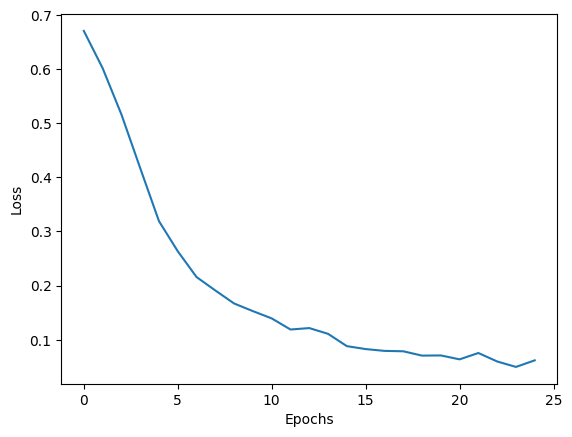

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

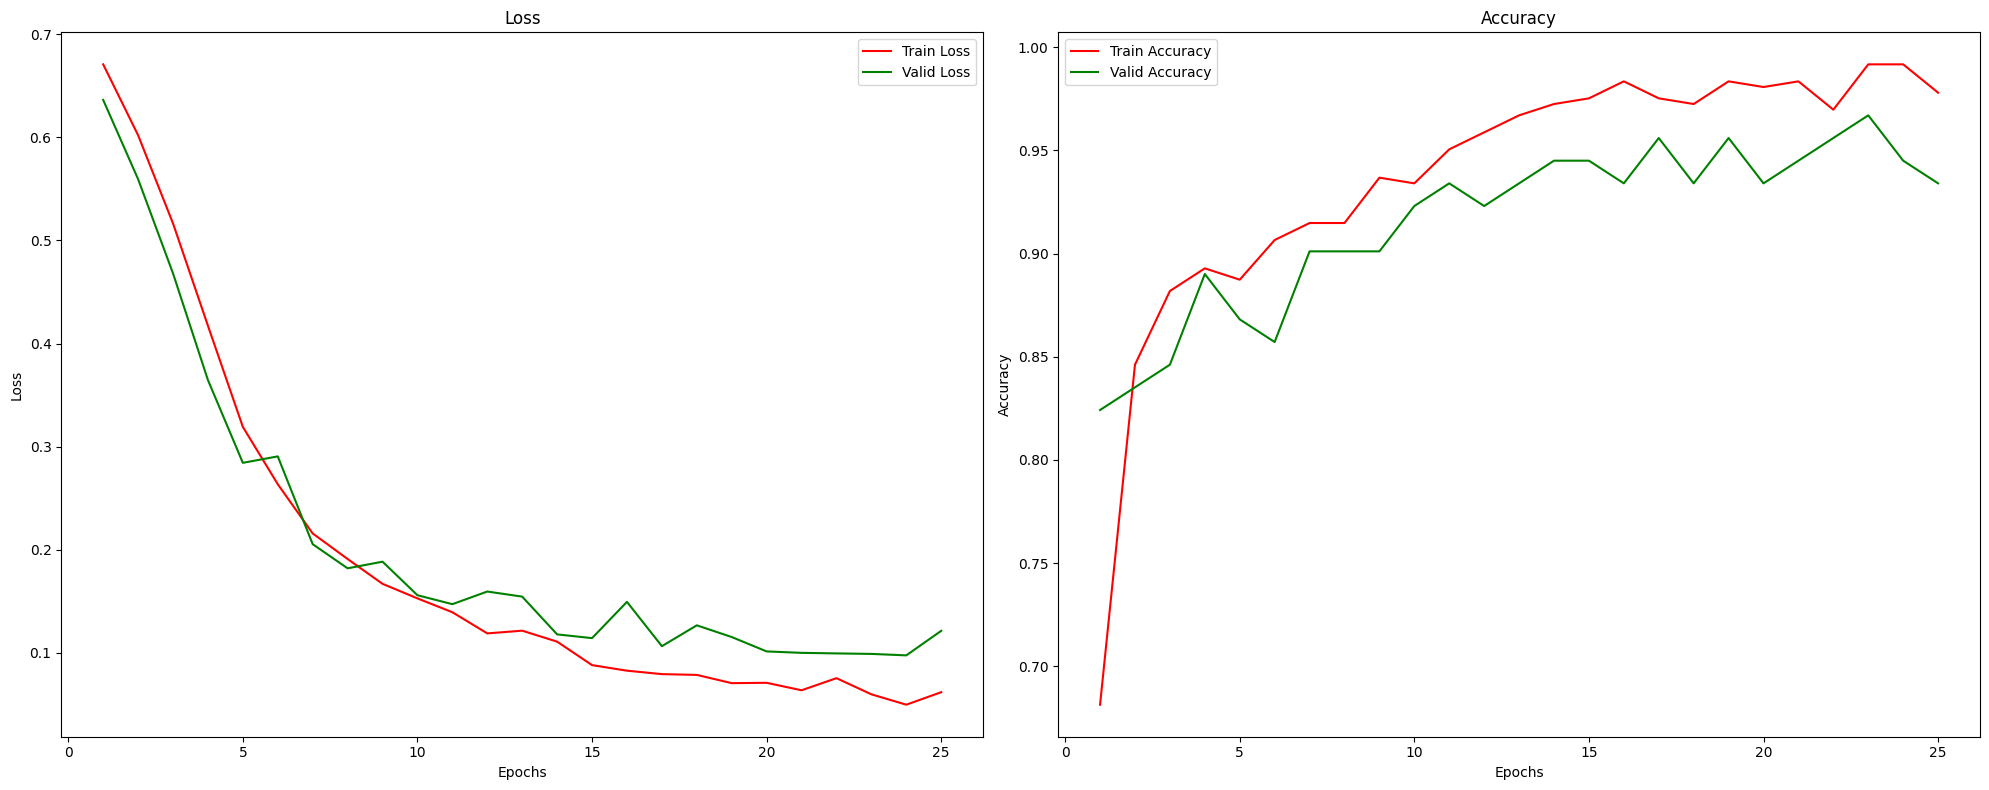

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 3, 40]])

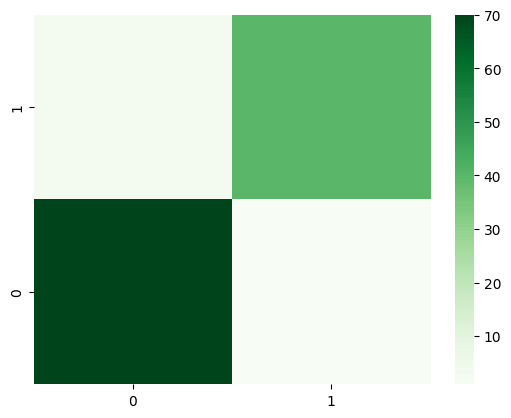

In [ ]:
sns.heatmap(cm,cmap='Greens')
plt.ylim(0, len(cm[0]))
plt.xlim(0, len(cm))
plt.show()

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#EDA

<ipython-input-65-cd4022590dff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis',data=df, ax=axs[1], palette=['#fb91b6', '#FFC2C2'])


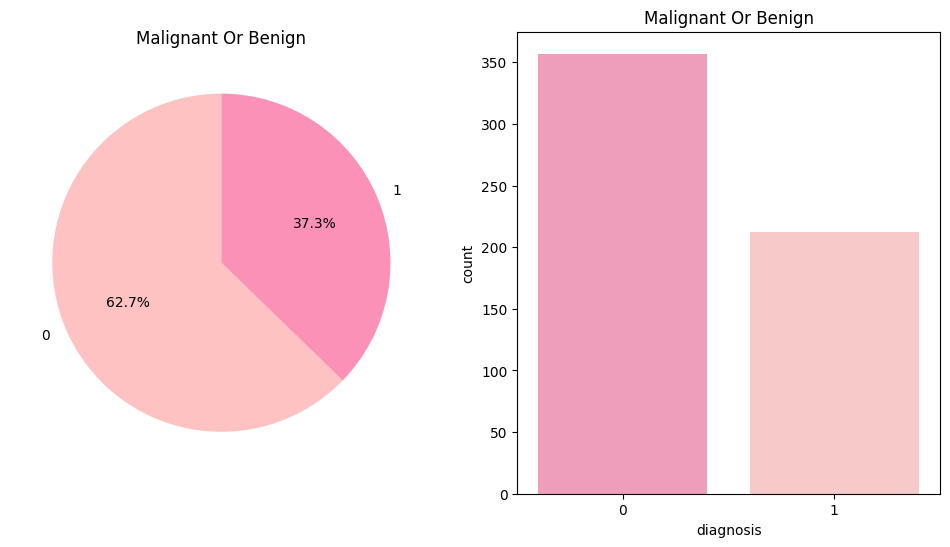

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(df['diagnosis'].value_counts(), labels=df['diagnosis'].value_counts().index,autopct='%1.1f%%',colors=['#FFC2C2', '#fb91b6'],startangle=90)
axs[0].set_title('Malignant Or Benign')

sns.countplot(x='diagnosis',data=df, ax=axs[1], palette=['#fb91b6', '#FFC2C2'])
axs[1].set_title('Malignant Or Benign')

plt.show()

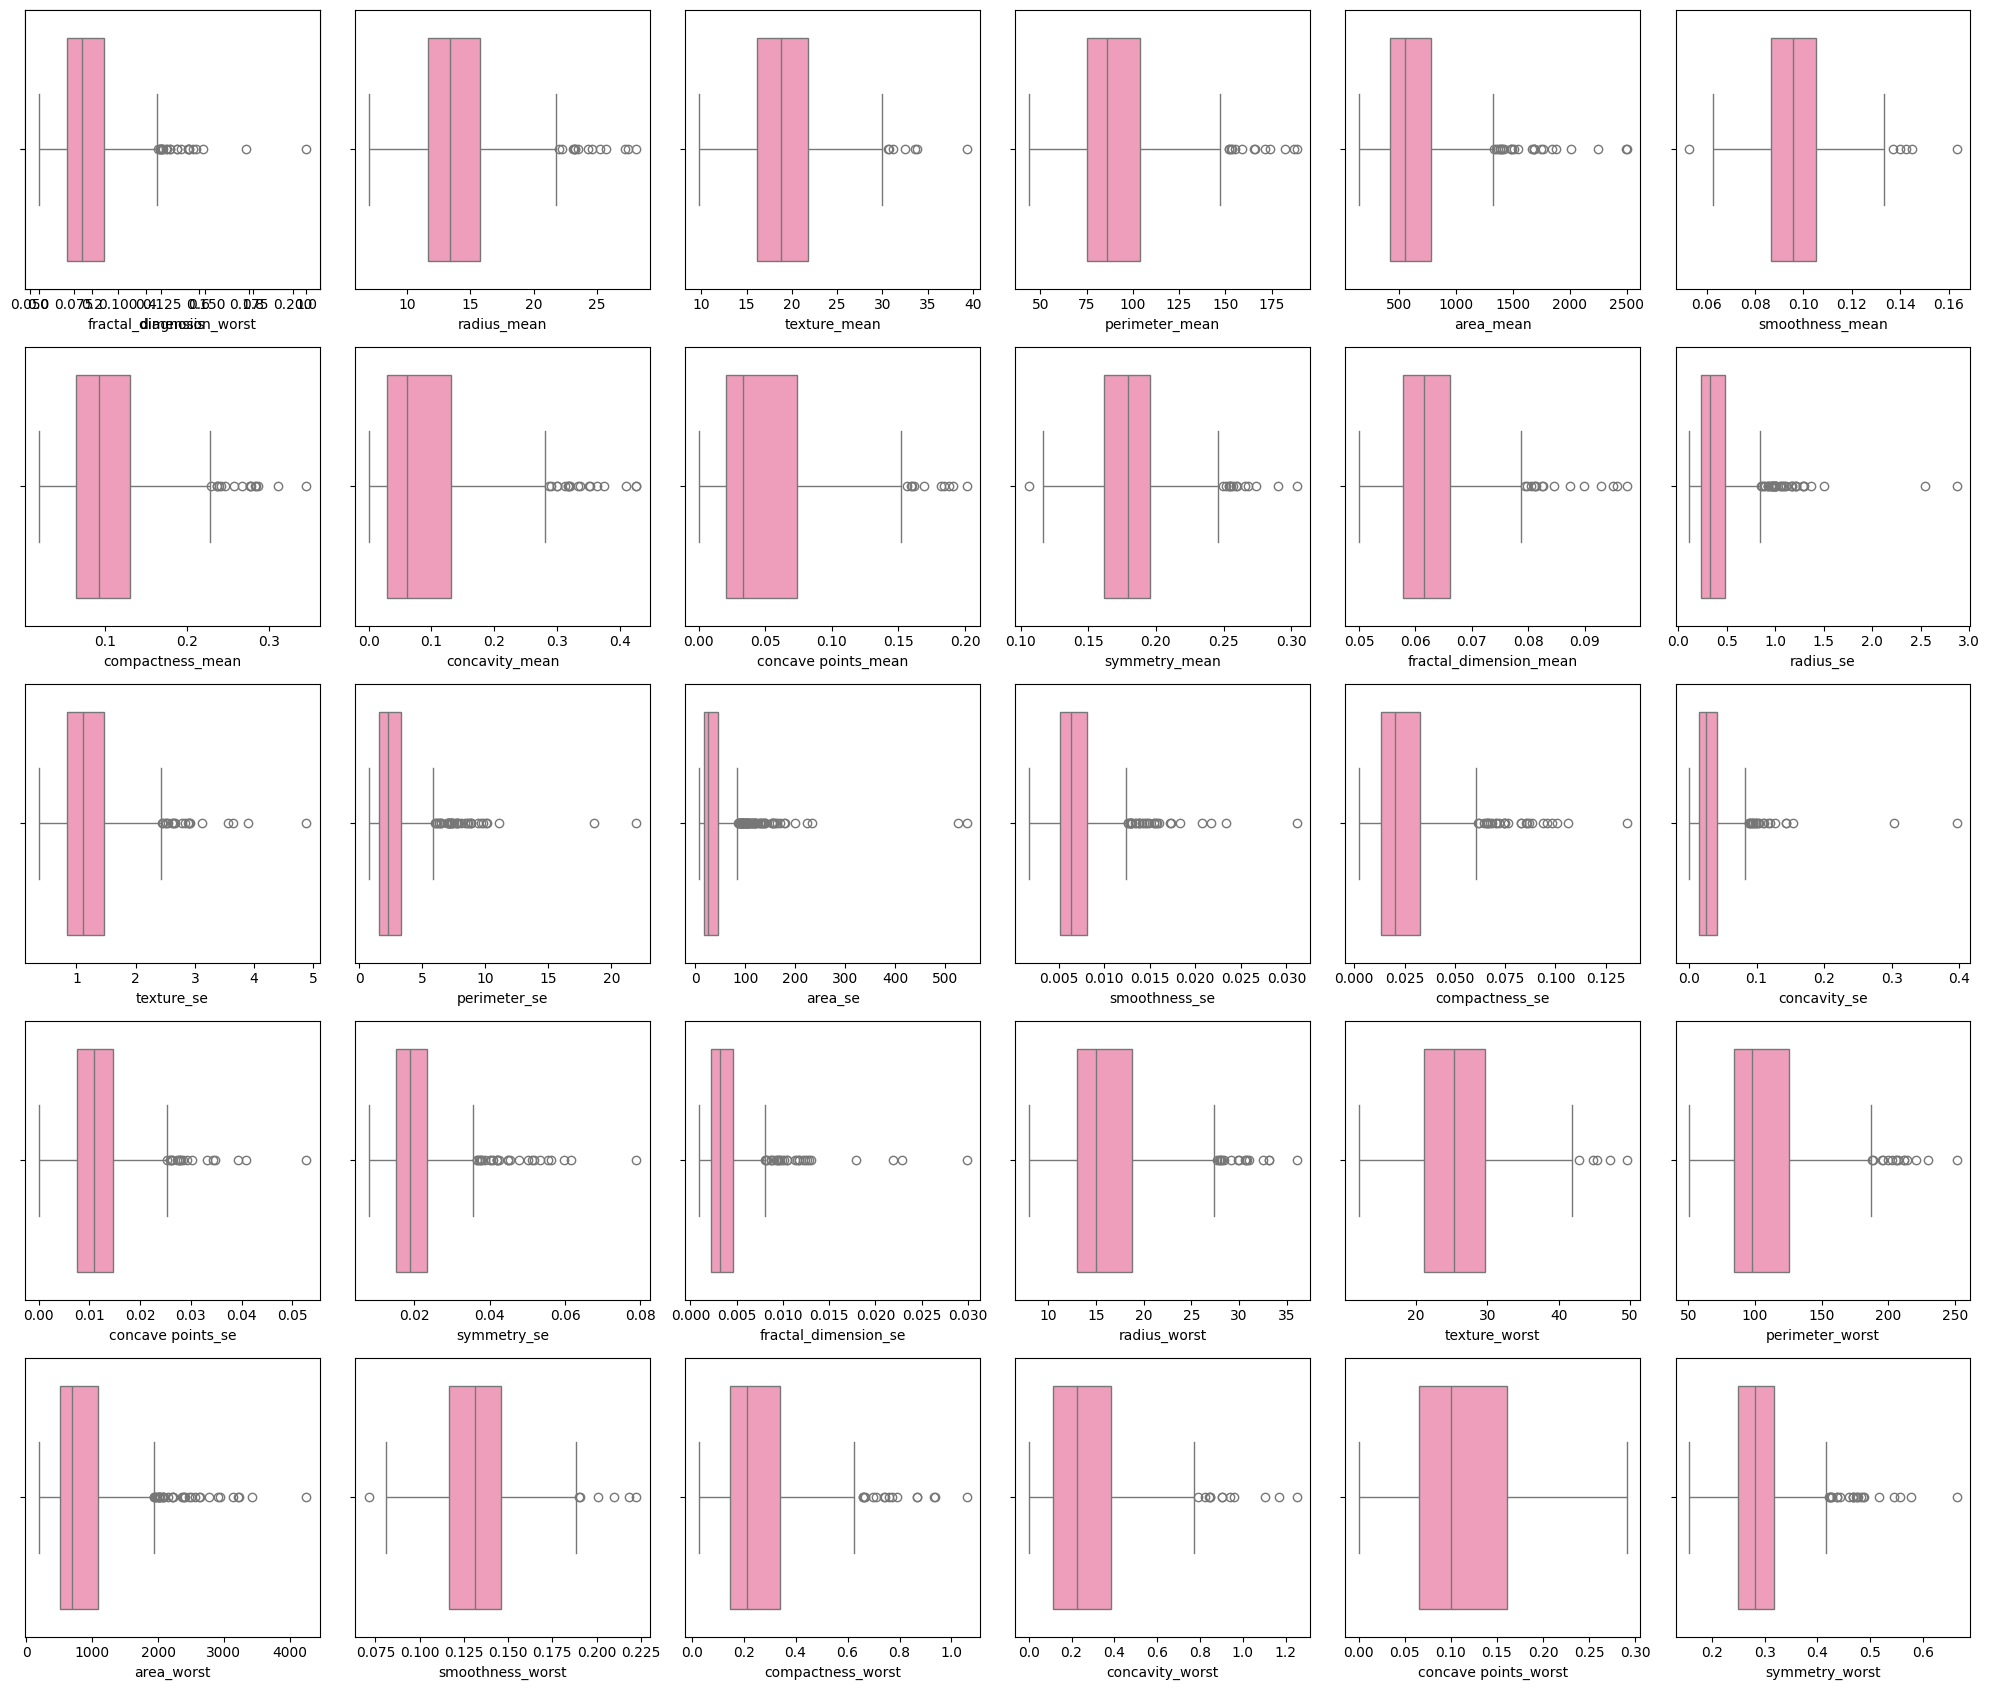

In [ ]:
fig = plt.figure(figsize=(20, 17))
counter = 0
for i in df.columns:
    if df[i].dtype != 'object':
        sub = fig.add_subplot(5, 6, counter % 30 + 1)  # Ensure the index wraps around
        g = sns.boxplot(x=i, data=df, color='#fb91b6')
        plt.tight_layout()
        counter += 1
plt.show()


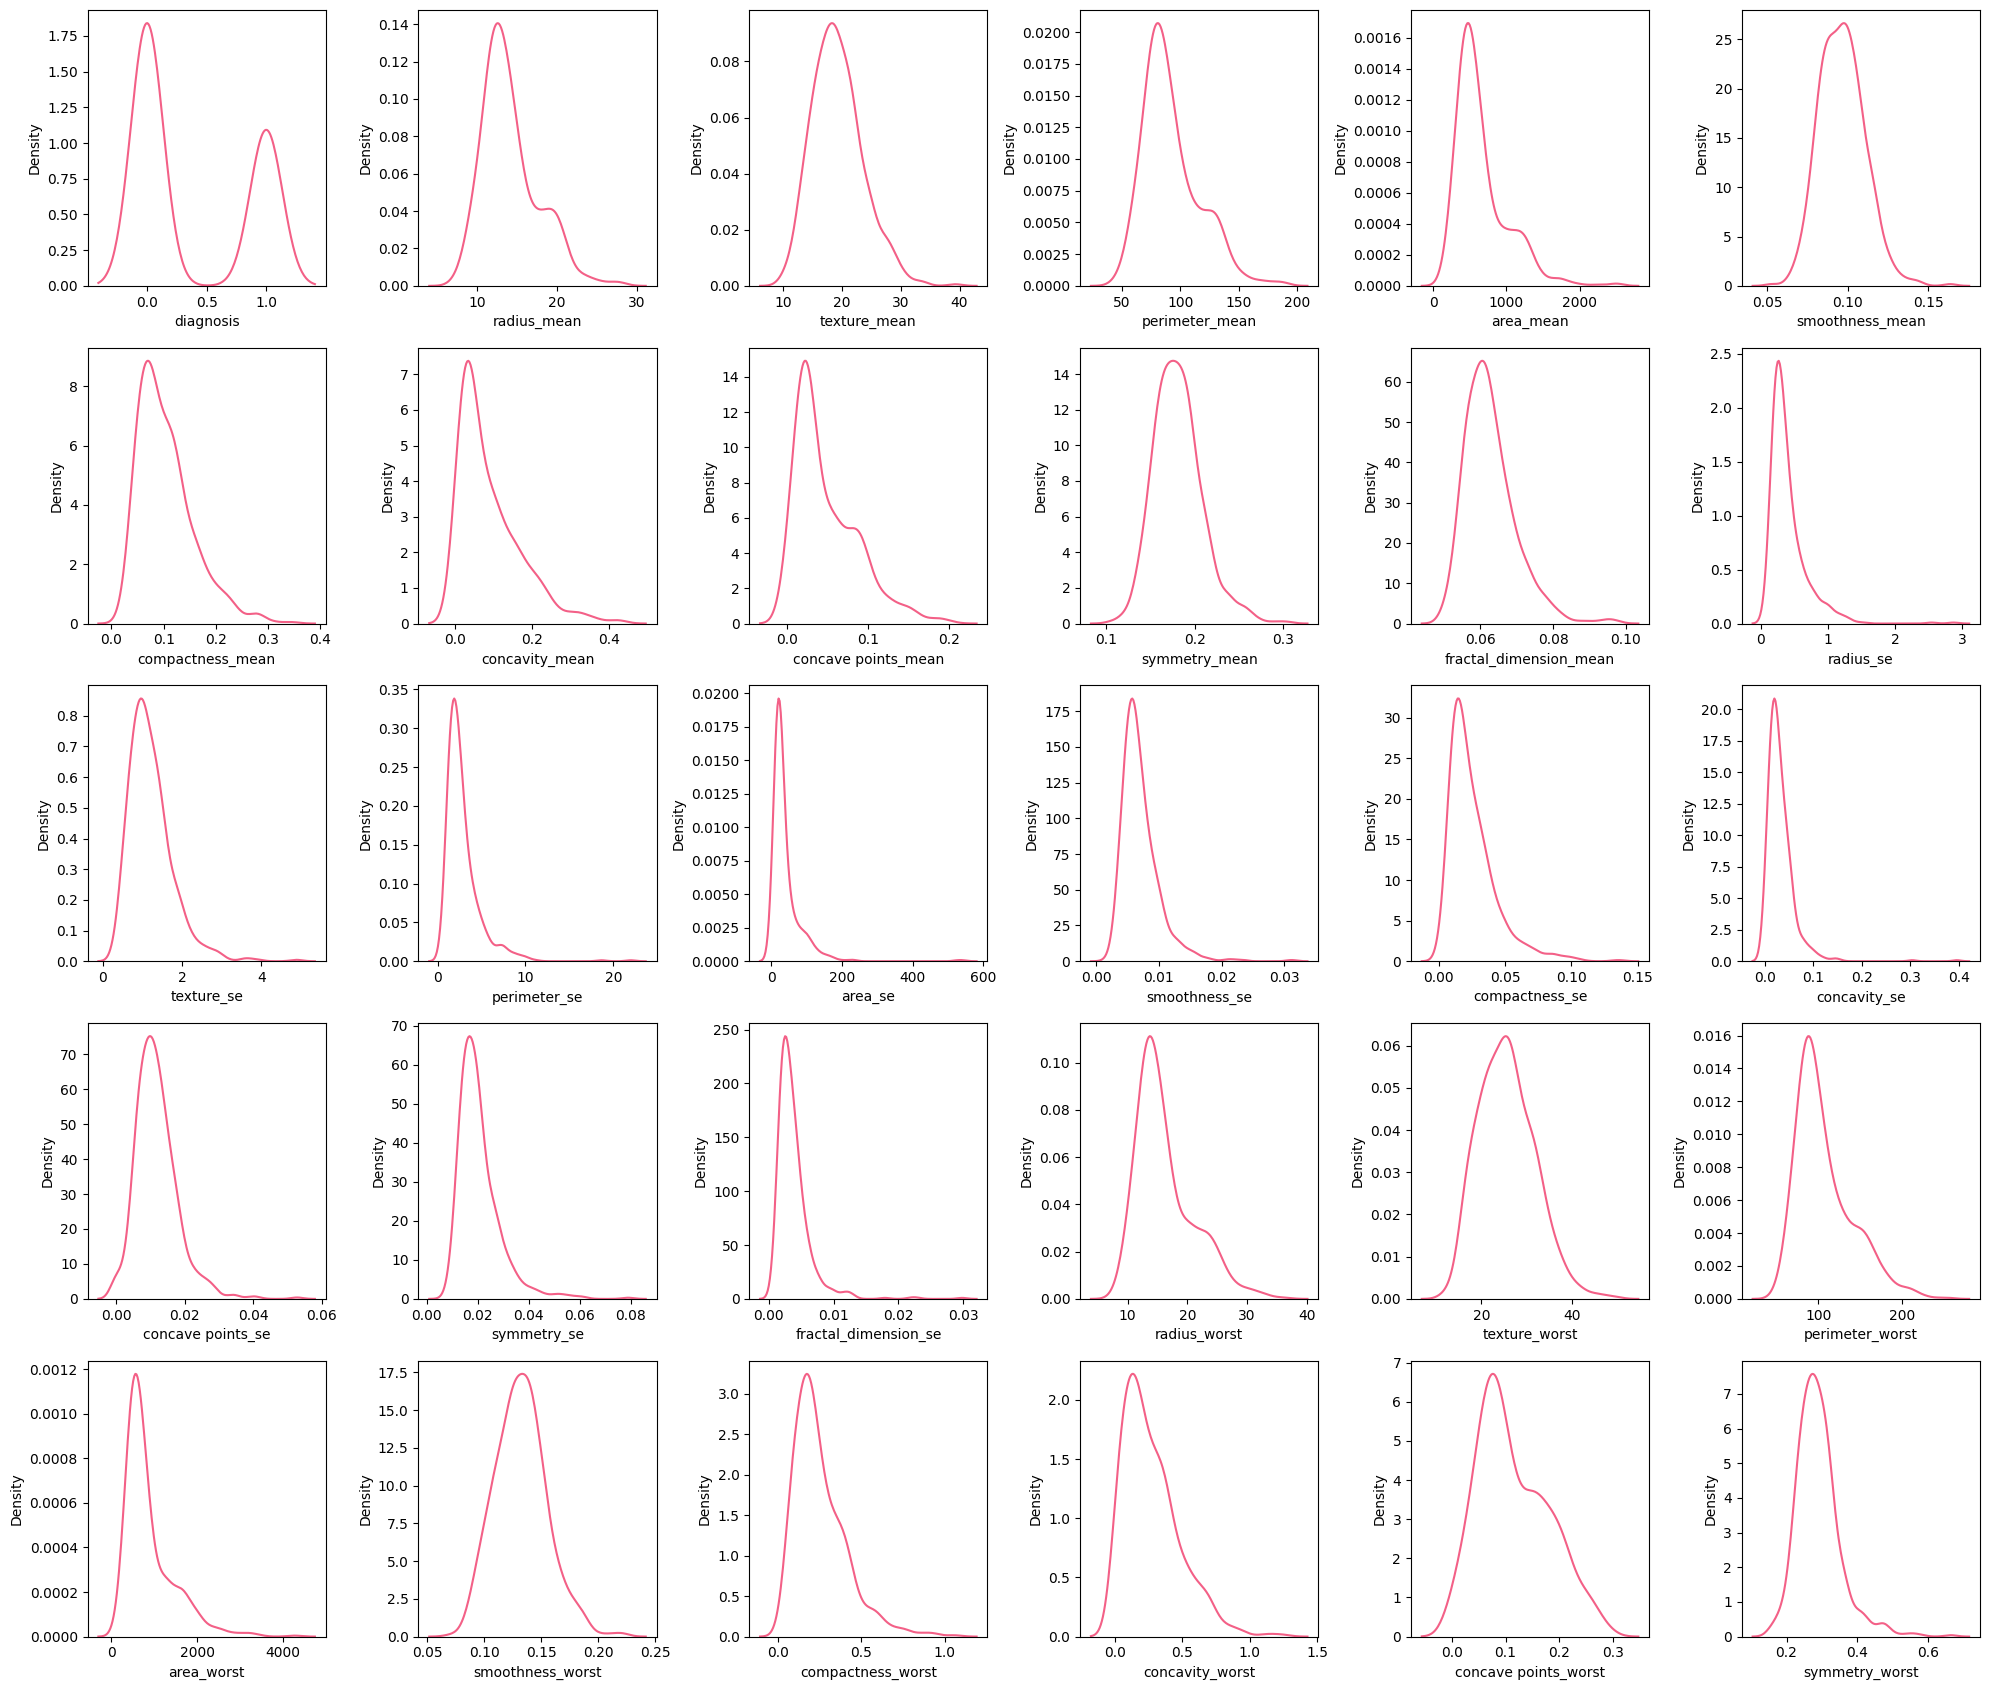

In [ ]:
fig = plt.figure(figsize=(20, 17))
counter = 0
for i in df.columns:
    if df[i].dtype != 'object':
        if counter < 30:  # Check if the counter is less than the number of subplots
            sub = fig.add_subplot(5, 6, counter + 1)
            g = sns.kdeplot(x=i, data=df, color='#f36087')
            plt.tight_layout()
            counter += 1
plt.show()  # Make sure to call plt.show() to display the figure


#SVM

In [ ]:
#import paskages
import pandas as pd

#plot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report

In [ ]:
import warnings
warnings.filterwarnings("ignore")

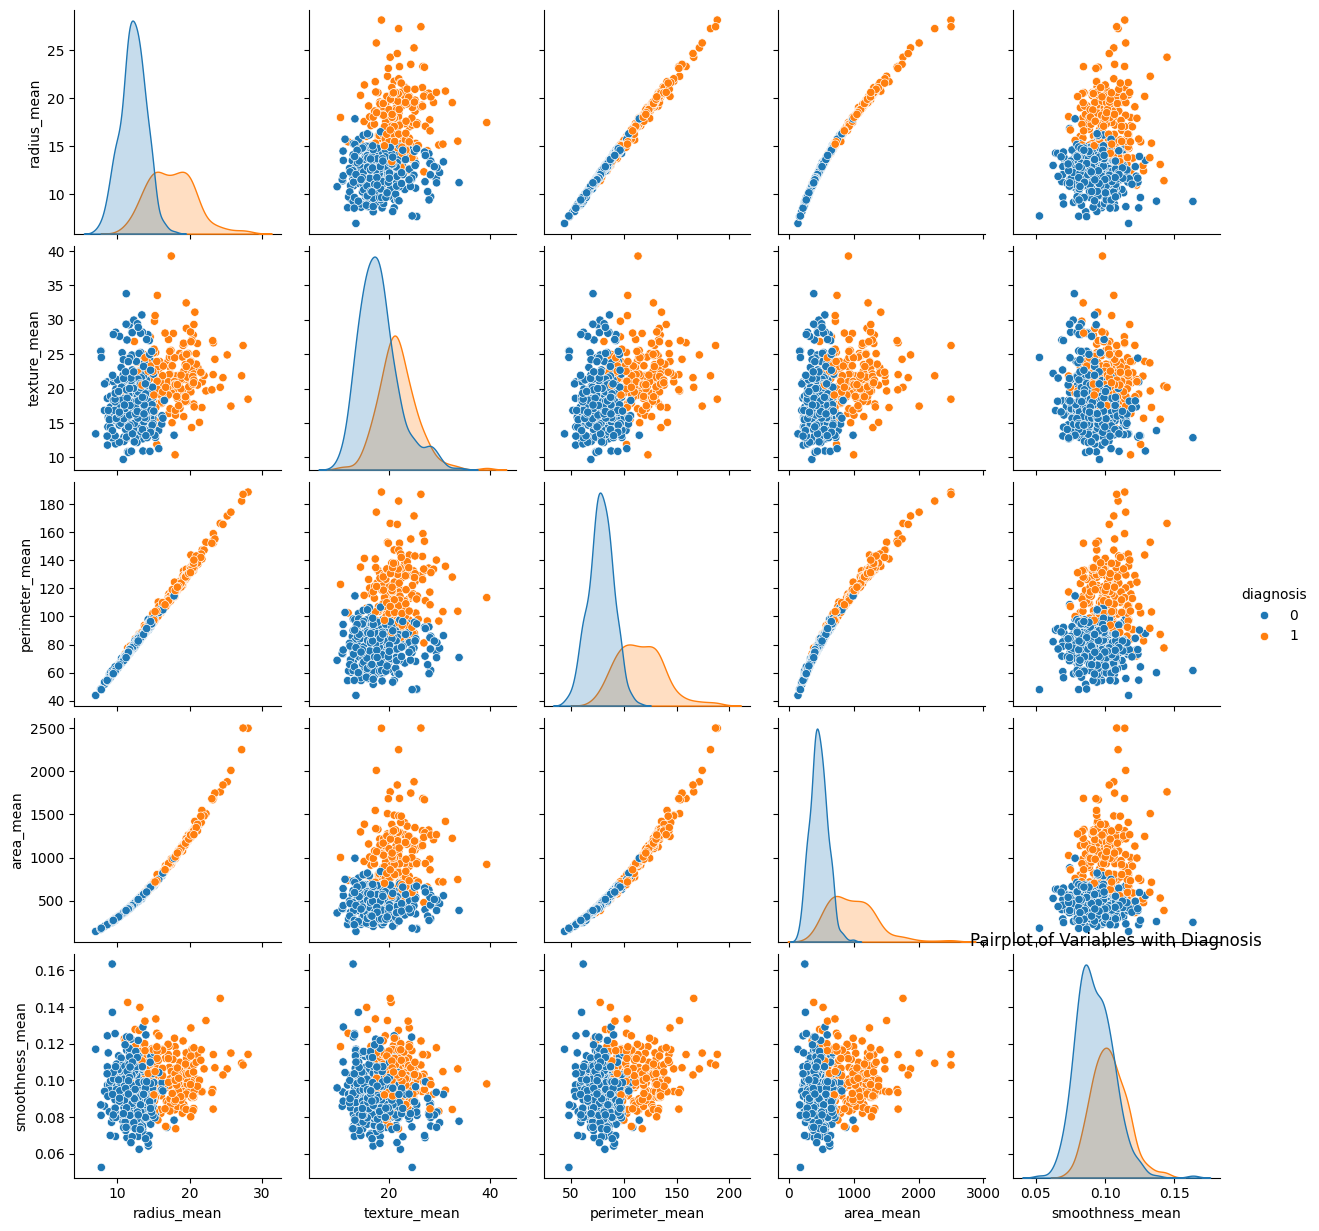

In [ ]:
# Pairplot for visualization of relationships between variables
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.title('Pairplot of Variables with Diagnosis')
plt.show()

diagnosis
0    357
1    212
Name: count, dtype: int64


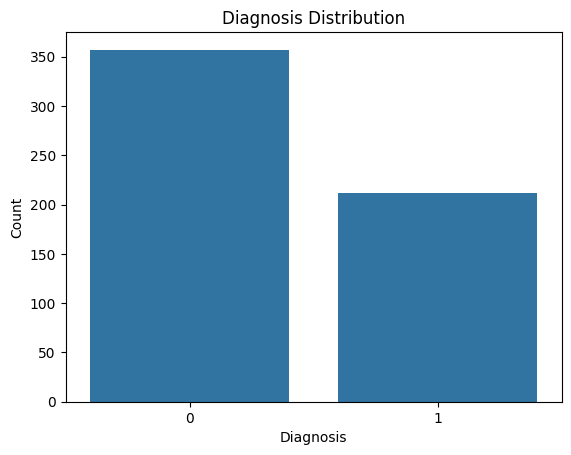

In [ ]:
#Distribution of diagnosis
print(df['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

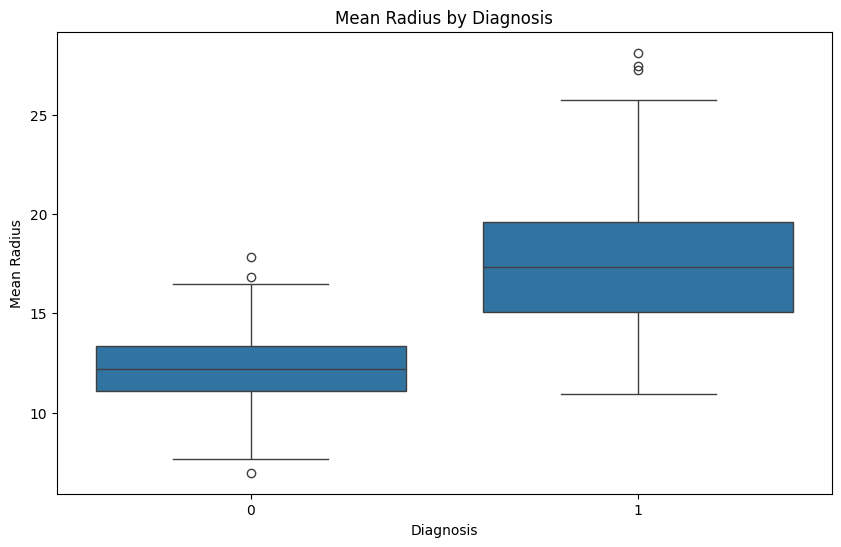

In [ ]:
#Boxplot for comparing variables by diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

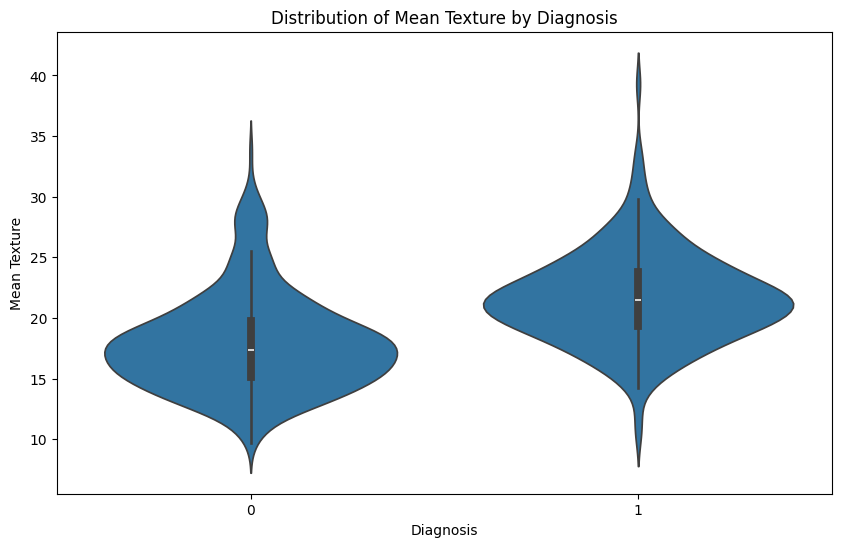

In [ ]:
# Violin plot to compare the distribution of mean texture by diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='texture_mean', data=df)
plt.title('Distribution of Mean Texture by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')
plt.show()

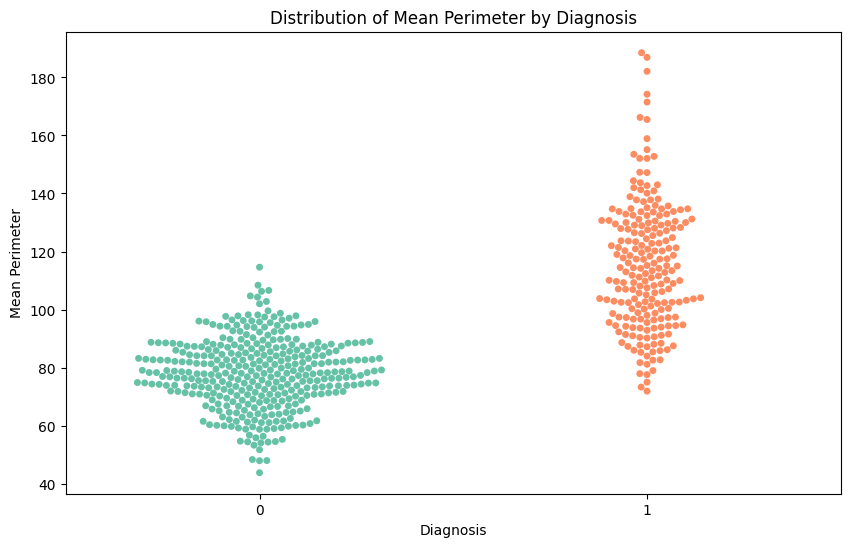

In [ ]:
# Swarm plot to visualize the distribution of mean perimeter by diagnosis
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='perimeter_mean', data=df, palette='Set2')
plt.title('Distribution of Mean Perimeter by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Perimeter')
plt.show()

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
#shape data
print(f"Shape of X: {X.shape}")

Shape of X: (569, 30)


In [ ]:
#shape target
print(f"Shape of y: {y.shape}")

Shape of y: (569,)


In [ ]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit scaler on training set and transform training set
X_train=scaler.fit_transform(X_train)

In [ ]:
# Transform testing set using parameters learned from training set
X_test=scaler.transform(X_test)

In [ ]:
# Checking the shape of the training
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (455, 30) (455,)


In [ ]:
# Checking the shape of testing sets

print("Testing set shape:", X_test.shape, y_test.shape)

Testing set shape: (114, 30) (114,)


In [ ]:
#Modeling
#multiple models, performing hyperparameter tuning, and implementing cross-validation:
# define a dictionary models containing three classifiers: Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN).
# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Cross-validation to evaluate each model
for name , model in models.items():
    scores=cross_val_score(model , X_train , y_train , cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

Random Forest Cross-Validation Accuracy: 0.9582 (±0.0176)
SVM Cross-Validation Accuracy: 0.9758 (±0.0128)
K-Nearest Neighbors Cross-Validation Accuracy: 0.9604 (±0.0215)


In [ ]:
# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function (only applicable if kernel='poly')
    'coef0': [0.0, 0.1, 1.0],  # Independent term in the polynomial and sigmoid kernels (only applicable if kernel='poly' or 'sigmoid')
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'probability': [True, False],  # Whether to enable probability estimates
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [-1, 1000, 2000]  # Maximum number of iterations
}

In [ ]:
# Initialize the SVM model
svm_model = SVC()

In [ ]:
# Perform grid search with cross-validation to find the best combination of hyperparameters
grid_search_svm = GridSearchCV(svm_model , param_grid=param_grid_svm,scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.1, 1.0],
                         'degree': [2, 3, 4],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'max_iter': [-1, 1000, 2000],
                         'probability': [True, False],
                         'shrinking': [True, False],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best hyperparameters found during grid search and the corresponding cross-validation accuracy
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy for SVM:", grid_search_svm.best_score_)

Best Parameters for SVM: {'C': 1, 'coef0': 1.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.001}
Best Cross-Validation Accuracy for SVM: 0.9780219780219781


In [ ]:
# Evaluate the best SVM model on the testing set
best_svm_model = grid_search_svm.best_estimator_
test_accuracy_svm = best_svm_model.score(X_test, y_test)
print("Testing Accuracy (Best SVM Model):", test_accuracy_svm)

Testing Accuracy (Best SVM Model): 0.9649122807017544


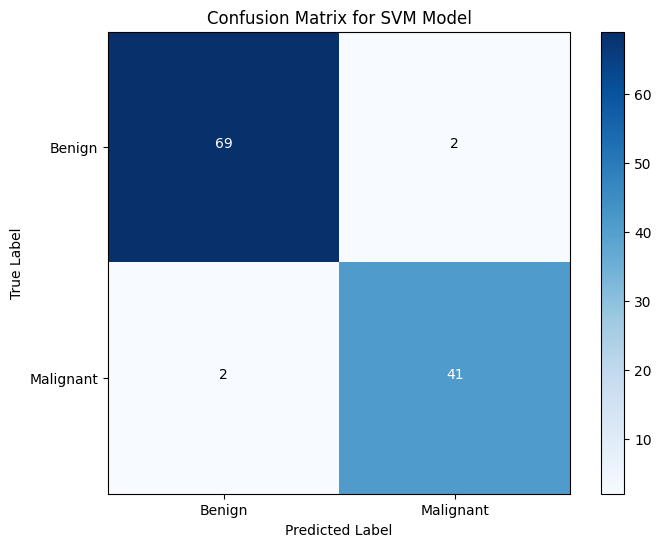

In [ ]:
# Plot confusion matrix
# Compute predictions
y_pred = best_svm_model.predict(X_test)


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

In [ ]:
# classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

# Print classification report
print("Classification Report for SVM Model:")
print(report)

In [ ]:
# classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

# Print classification report
print("Classification Report for SVM Model:")
print(report)

Classification Report for SVM Model:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Keras

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
X = df[['radius_mean',	'texture_mean'	,'perimeter_mean',	'area_mean',	'smoothness_mean']].values  # Replace with actual column names
y = df['diagnosis'].values  # Replace with the name of your target column

# Encoding the target variable if it's categorical
leb = LabelEncoder()
y = leb.fit_transform(y)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


#add first input and hidden layer

classifier = Sequential()
classifier.add(Dense(3, activation='relu'))


#add second hidden layer
classifier.add(Dense(3, activation='relu'))

#adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 0.9310 - accuracy: 0.5957
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.9083 - accuracy: 0.5879
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8866 - accuracy: 0.5859
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.5840
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.5898
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8234 - accuracy: 0.5840
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8030 - accuracy: 0.5801
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.5820
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7634 - accuracy: 0.5820
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7448 - accuracy: 0.5879
Epoch 11/100
6/6 [===========

In [ ]:
#Predict test result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 4ms/step


In [ ]:
#Make Confusion metrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

<Axes: >

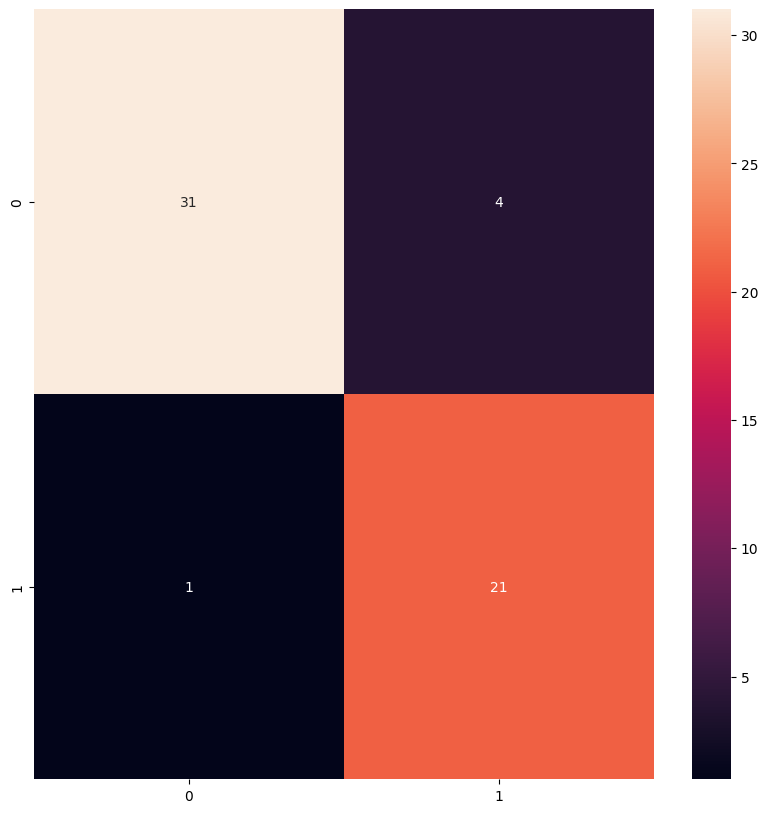

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)